# Imports and Defaults

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wandb

In [2]:
sns.set_theme(style="darkgrid")

# Download Data

In [3]:
api = wandb.Api()
entity, project = "gilad-turok", "funnel10"
tags = ["drghmc-baseline", "drhmc-baseline", "hmc-baseline", "nuts-baseline"]
tags_formatted = [{"tags" : tag} for tag in tags]
runs = api.runs(f"{entity}/{project}", filters={"$or": tags_formatted})

In [4]:
summary_keys = ["funnel10_squared_error/se1_scale", "funnel10_squared_error/se2_scale", "funnel10_squared_error/se1_latent", "funnel10_squared_error/se2_latent"]

def metric_str(k):
    metric = k.split("/")[-1]
    if metric == "se1_scale":
        return "log scale"
    elif metric == "se2_scale":
        return "log scale squared"
    elif metric == "se1_latent":
        return "latent"
    elif metric == "se2_latent":
        return "latent squared"
    

run_data = []
for run in runs:
    run_data.append(
        {metric_str(k):v for k, v in run.summary._json_dict.items() if k in summary_keys} | {k: v for k, v in run.config.items()} | {"name": run.name, "group": run.group, "tags": run.tags[0], "job": run.job_type}
    )
    
runs_df = pd.DataFrame.from_records(run_data)

# Format Dataframe

In [5]:
value_vars = ["log scale", "log scale squared", "latent", "latent squared"]
id_vars = [col for col in runs_df.columns if col not in value_vars]
melted = pd.melt(runs_df, id_vars=id_vars, value_vars=value_vars, var_name="param", value_name="squared error")

filtered = melted[melted["job"] == "metrics"]

data = filtered

# Plotting

In [6]:
data

,wandb,logging,sampler,posterior,name,group,tags,job,param,squared error
0,"{'tags': 'drghmc-baseline', 'entity': 'gilad-t...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 59, 'metric'...","{'dir': 'posteriors', 'name': 'funnel10'}",cherry-bun-60725,damping=0.1__max_proposals=3__reduction_factor...,drghmc-baseline,metrics,log scale,0.078576
1,"{'tags': 'drghmc-baseline', 'entity': 'gilad-t...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 6, 'metric':...","{'dir': 'posteriors', 'name': 'funnel10'}",peanut-butter-pastry-60724,damping=0.1__max_proposals=3__reduction_factor...,drghmc-baseline,metrics,log scale,0.519352
2,"{'tags': 'drghmc-baseline', 'entity': 'gilad-t...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 1, 'metric':...","{'dir': 'posteriors', 'name': 'funnel10'}",mocha-bun-60723,damping=0.1__max_proposals=3__reduction_factor...,drghmc-baseline,metrics,log scale,0.080045
3,"{'tags': 'drghmc-baseline', 'entity': 'gilad-t...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 78, 'metric'...","{'dir': 'posteriors', 'name': 'funnel10'}",elderberry-flambee-60722,damping=0.1__max_proposals=3__reduction_factor...,drghmc-baseline,metrics,log scale,0.319308
4,"{'tags': 'drghmc-baseline', 'entity': 'gilad-t...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 14, 'metric'...","{'dir': 'posteriors', 'name': 'funnel10'}",rhubarb-flan-60721,damping=0.1__max_proposals=3__reduction_factor...,drghmc-baseline,metrics,log scale,0.091688
...,...,...,...,...,...,...,...,...,...,...
3145,"{'tags': 'nuts-baseline', 'entity': 'gilad-tur...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 31, 'metric'...","{'dir': 'posteriors', 'name': 'funnel10'}",fragrant-forest-55469,sampler_type=nuts,nuts-baseline,metrics,latent squared,5951.399647
3148,"{'tags': 'nuts-baseline', 'entity': 'gilad-tur...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 38, 'metric'...","{'dir': 'posteriors', 'name': 'funnel10'}",radiant-glade-55466,sampler_type=nuts,nuts-baseline,metrics,latent squared,10645.120478
3149,"{'tags': 'nuts-baseline', 'entity': 'gilad-tur...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 29, 'metric'...","{'dir': 'posteriors', 'name': 'funnel10'}",good-aardvark-55464,sampler_type=nuts,nuts-baseline,metrics,latent squared,291.751307
3150,"{'tags': 'nuts-baseline', 'entity': 'gilad-tur...","{'logger': 'wandb', 'log_history': True, 'log_...","{'seed': 42, 'thin': 10, 'chain': 4, 'metric':...","{'dir': 'posteriors', 'name': 'funnel10'}",helpful-sun-55463,sampler_type=nuts,nuts-baseline,metrics,latent squared,2147.717544


/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Distribution of Squared Errors: 100 Chains on 10-Dim Funnel')

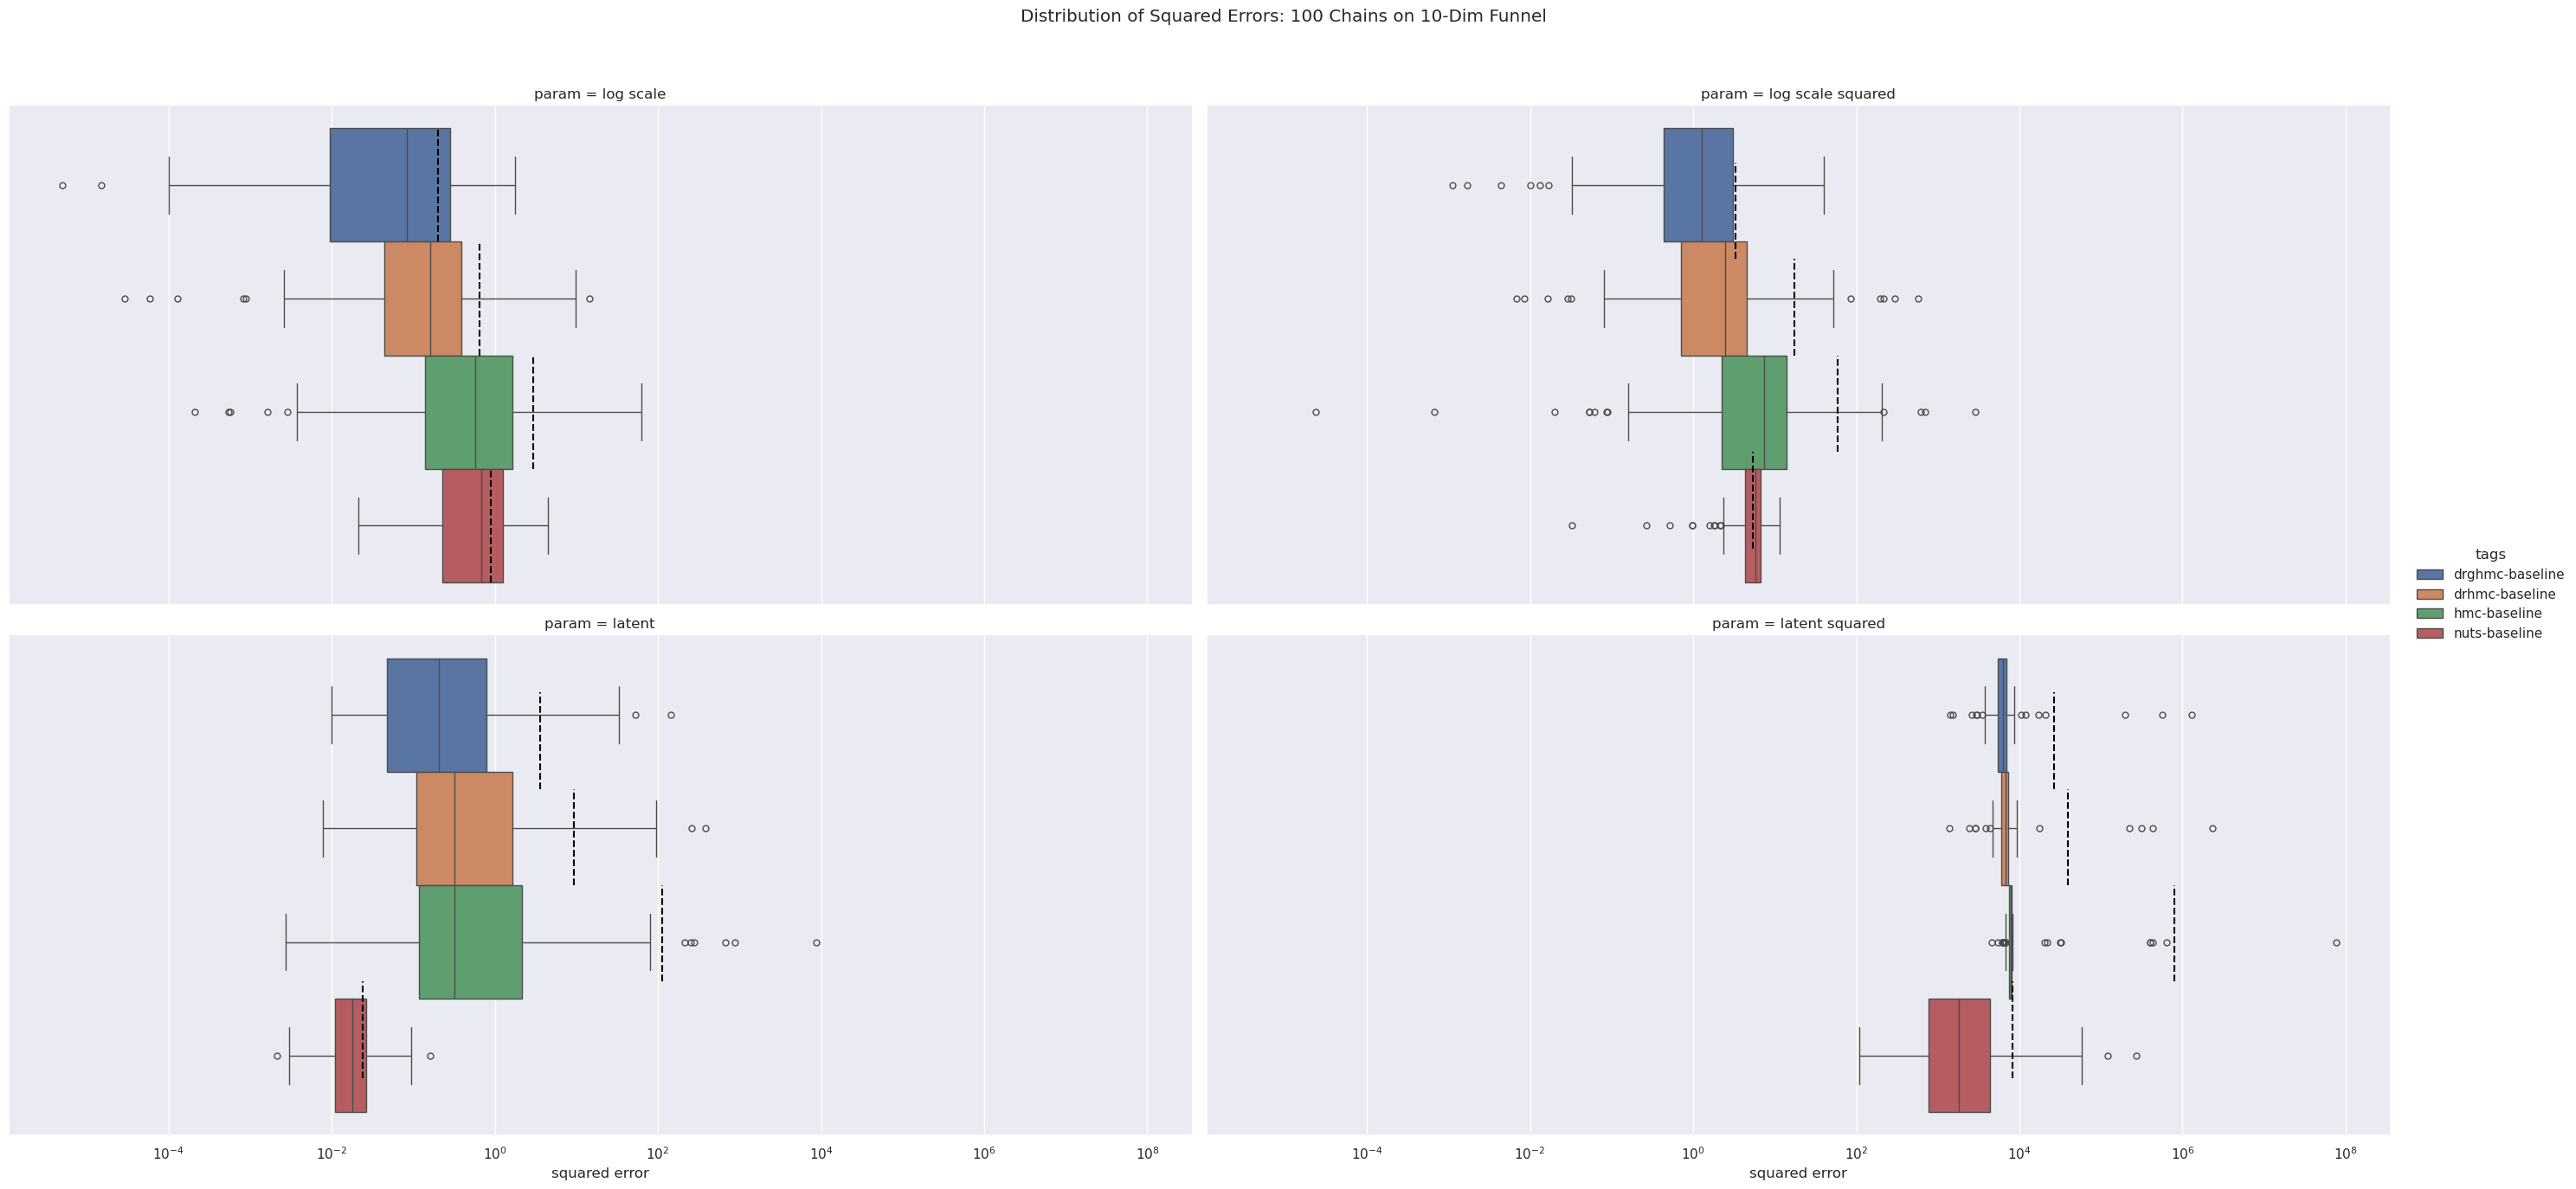

In [9]:
fig = sns.catplot(
    kind="box",
    data=data,
    x="squared error",
    # y="tags",
    # showmeans=True,
    # meanline=True,
    # meanprops={"color": "black"},
    hue="tags",
    hue_order=tags,
    col="param",
    col_wrap=2,
    col_order=["log scale", "log scale squared", "latent", "latent squared"],
    log_scale=True,
    aspect=2,
    height=7,
)

for ax, param in zip(fig.axes.flat, value_vars):
    y_start, y_stop = ax.get_ylim()[0] - 0.1, ax.get_ylim()[1] + 0.1
    for idx, tag in enumerate(tags):
        tag_data = data[(data["tags"] == tag) & (data["param"] == param)]
        mean = tag_data["squared error"].mean()
        median = tag_data["squared error"].median()
        standard_error = tag_data["squared error"].std()
        
        color = sns.color_palette("tab10")[tags.index(tag)]
        ax.plot([], [], color=color, label=f"μ={mean:.0e} SE={standard_error:.0e} M={median:.0e}")
        # plot a vertical line for the mean 
        # compute the y start and stop to be the same location as the specific box
        # relative to y_start and y_stop with idx
        idx = len(tags) - (idx + 1)
        start = y_start + (y_stop - y_start) * (idx / len(tags))
        stop = y_start + (y_stop - y_start) * ((idx + 1) / len(tags))
        ax.vlines(mean, start, stop, color="black", linestyle="--")
        # ax.legend()

# print y axis limits
fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle("Distribution of Squared Errors: 100 Chains on 10-Dim Funnel")

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Distribution of Squared Errors: 100 Chains on 10-Dim Funnel')

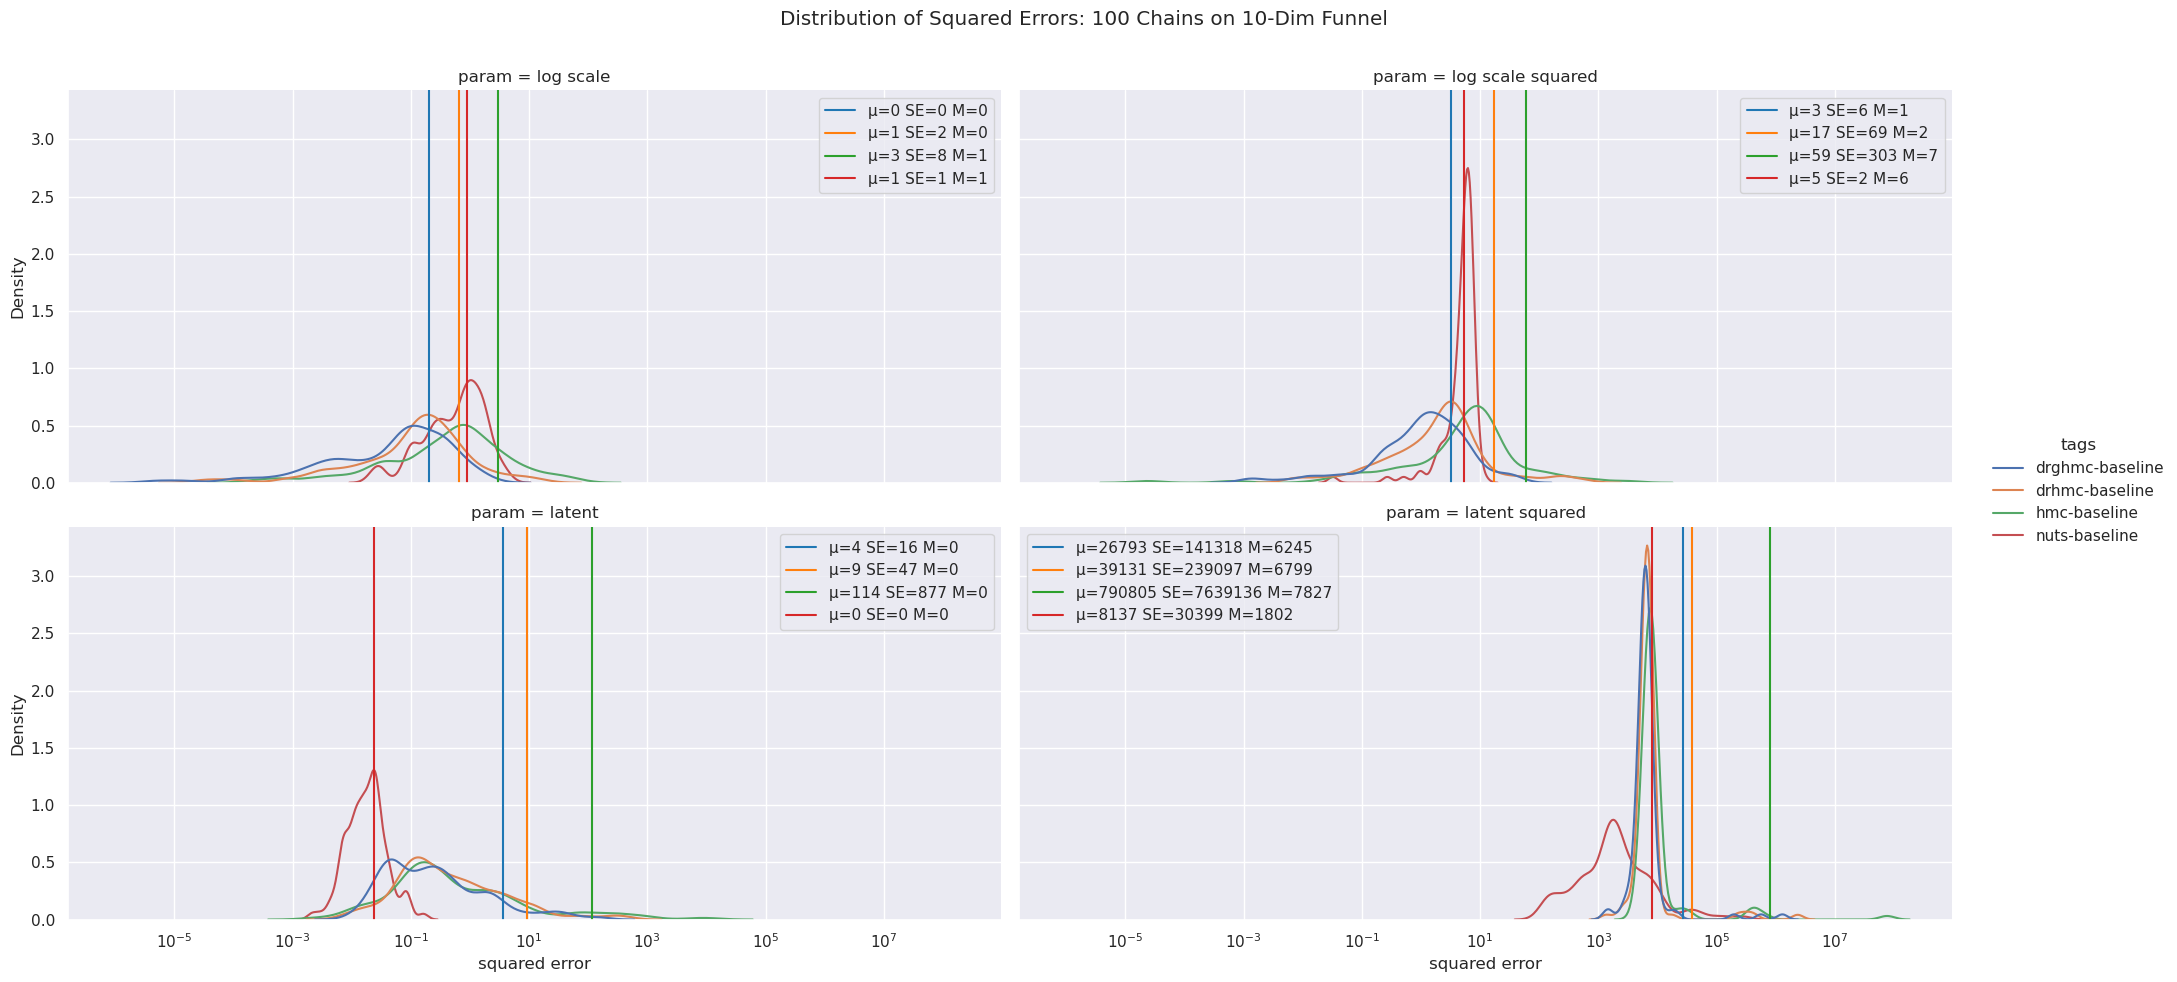

In [43]:
fig = sns.displot(
    kind="kde",
    data=data,
    x="squared error",
    hue="tags",
    hue_order=tags,
    col="param",
    col_wrap=2,
    col_order=["log scale", "log scale squared", "latent", "latent squared"],
    bw_adjust=0.6,
    common_norm=False,
    log_scale = (True, False),
    aspect=2,
)

for ax, param in zip(fig.axes.flat, value_vars):
    for tag in tags:
        tag_data = data[(data["tags"] == tag) & (data["param"] == param)]
        mean = tag_data["squared error"].mean()
        median = tag_data["squared error"].median()
        standard_error = tag_data["squared error"].std()
        
        color = sns.color_palette("tab10")[tags.index(tag)]
        ax.plot([], [], color=color, label=f"μ={mean:.0f} SE={standard_error:.0f} M={median:.0f}")
        ax.axvline(mean, color=color, linestyle="-")
        ax.legend()

fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle("Distribution of Squared Errors: 100 Chains on 10-Dim Funnel")

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Distribution of Squared Errors: 100 Chains on 10-Dim Funnel')

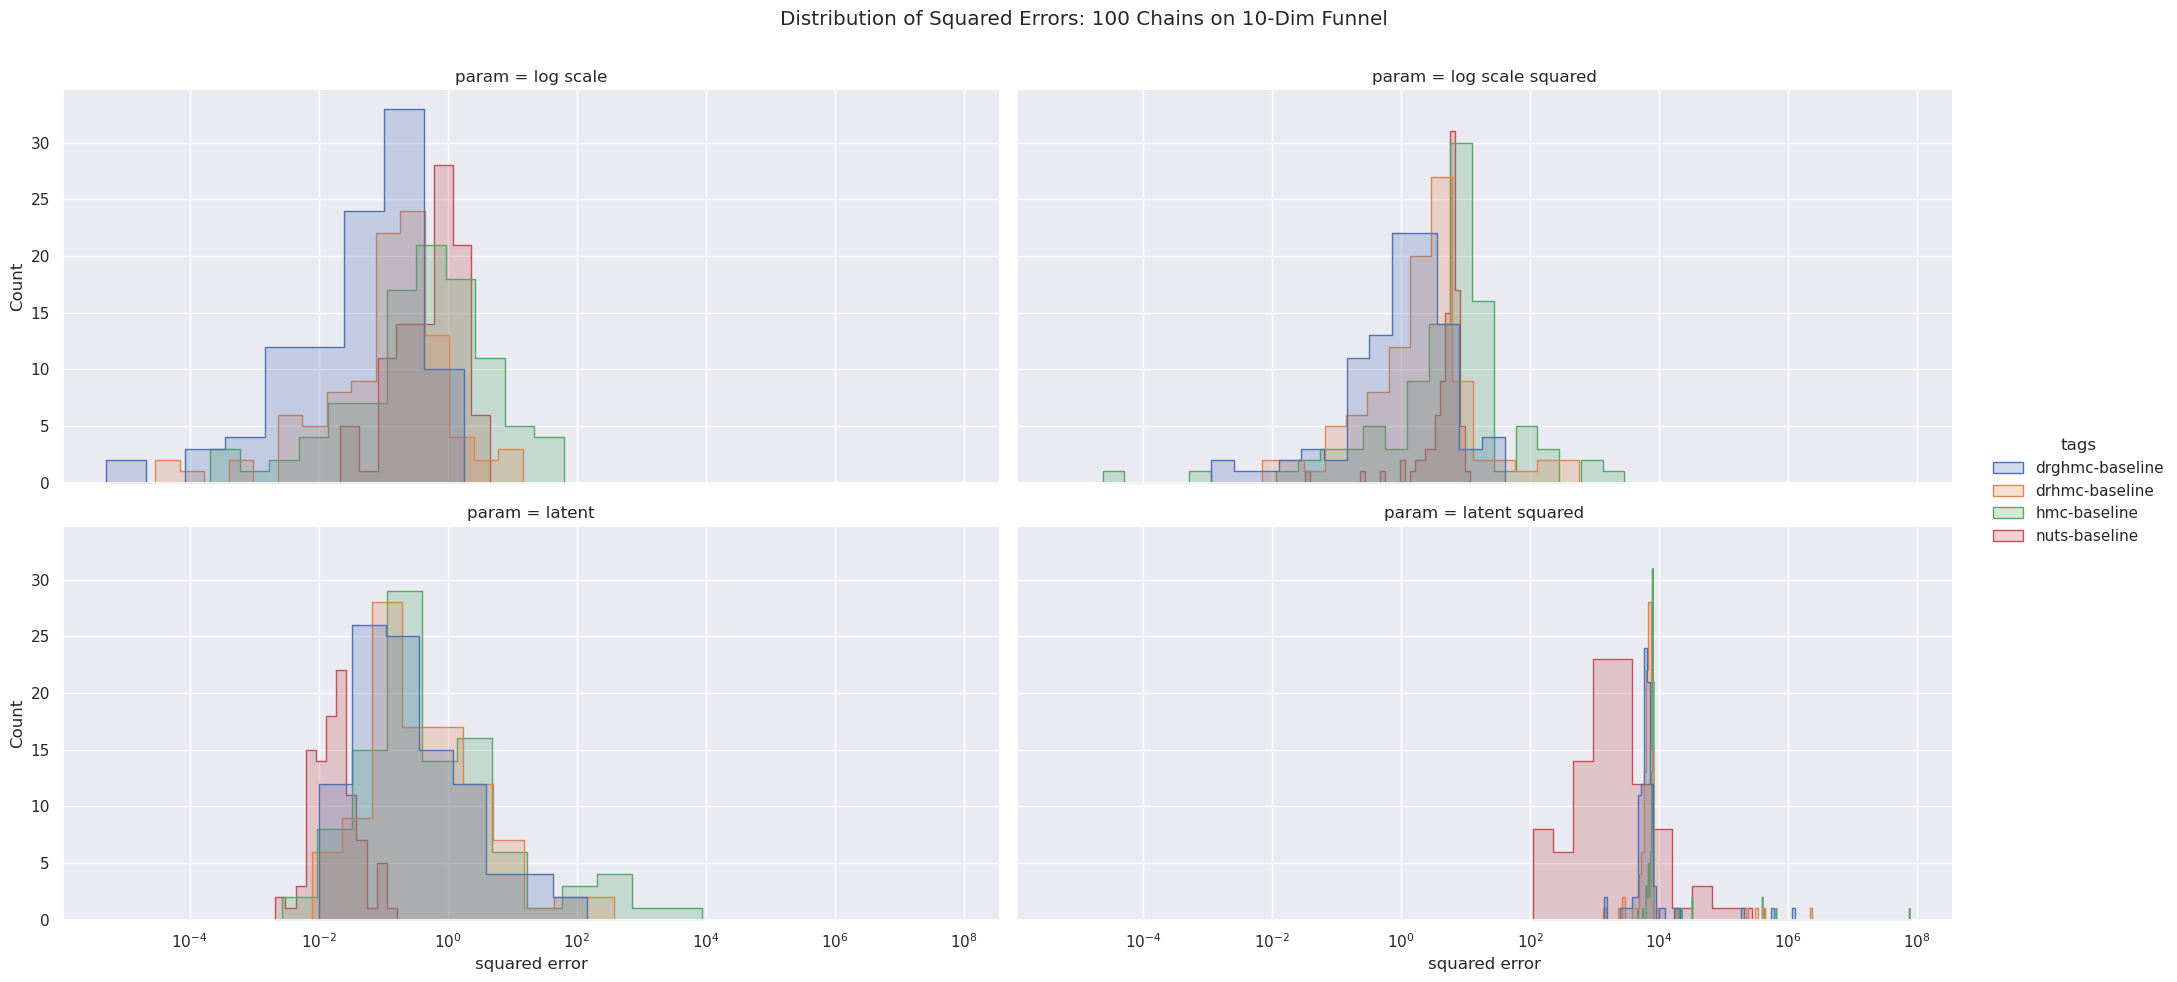

In [12]:
fig = sns.displot(
    kind="hist",
    data=data,
    x="squared error",
    hue="tags",
    col="param",
    col_wrap=2,
    col_order=["log scale", "log scale squared", "latent", "latent squared"],
    element="step",
    multiple="layer",
    # bins=50,
    # kde=True,
    # kde_kws={"bw_adjust": 0.5},
    common_bins=False,
    log_scale = (True, False),
    aspect=2,
)

# iterate over axes and plot mean and median
# do so for each axis, specified by metric, and each tag
# plot a line for the mean and median of each tag with the same color as the histogram
# and add a legend label with the mean and median values
for ax, param in zip(fig.axes.flat, value_vars):
    for tag in tags:
        tag_data = data[(data["tags"] == tag) & (data["param"] == param)]
        mean = tag_data["squared error"].mean()
        median = tag_data["squared error"].median()
        standard_error = tag_data["squared error"].std()
        
        color = sns.color_palette("tab10")[tags.index(tag)]
        ax.plot([], [], color=color, label=f"μ={mean:.0e} SE={standard_error:.0e} M={median:.0e}")
        # ax.legend()

fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle("Distribution of Squared Errors: 100 Chains on 10-Dim Funnel")